<a href="https://colab.research.google.com/github/mths22/Portfolio/blob/main/cyclistic_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introduction**

Brief Overview of Cyclistic and the Purpose of the Case Study:

Cyclistic is a bike-share company based in Chicago that serves two types of clients: casual riders and members. Members pay an annual fee, allowing them to save on individual trip costs since they do not pay per ride. Casual riders, on the other hand, pay for each trip as they use the bikes, without any upfront commitment.

Objective of the Case Study:

The main objective of this case study is to analyze and identify trends and patterns that differentiate how casual riders and members use Cyclistic bikes. This analysis will focus on the most recent dataset available to ensure accuracy and relevance. By gaining insights into usage patterns, Cyclistic can better understand how to convert casual riders into members, who are significantly more profitable for the company.


**2. Business Task**

Statement of Business Task:

Cyclistic’s main objective is to encourage casual riders to purchase annual memberships. Since casual riders already use Cyclistic’s services, they likely have a level of trust in the company, making them more receptive to upgrading than entirely new prospects. Additionally, memberships are significantly more profitable for Cyclistic, so converting casual riders into subscribers who pay an annual fee aligns with Cyclistic's goal of increasing revenue through sustained, predictable income.

Context and Importance:

Understanding casual riders' behavior when using Cyclistic’s bikes allows us to identify the motivations behind their usage patterns. This knowledge enables Cyclistic to design targeted marketing campaigns that resonate with casual riders’ needs and preferences, increasing the likelihood of converting them into members. Highlighting additional benefits, such as the health advantages of regular biking, could further enhance the appeal of membership.




**3. Data Sources** (https://divvy-tripdata.s3.amazonaws.com/index.html)
   
Dataset Description:

For this analysis, I used two datasets:

Divvy 2019 Q1: This dataset includes bike trip data from the first quarter of 2019.

Divvy 2020 Q1: This dataset includes bike trip data from the first quarter of 2020.

Each dataset contains relevant fields for trip details, rider types, and stations:

Divvy 2020 Q1 -  includes columns such as -  ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, and member_casual.

Divvy 2019 Q1 - includes columns like -  trip_id, start_time, end_time, bikeid, tripduration, from_station_id, from_station_name, to_station_id, to_station_name, usertype, gender, and birthyear.


Source Information

These datasets were extracted from Cyclistic’s public dataset available at Divvy Trip Data.

Fields of Interest:

Key fields of interest for this analysis included:

ride_length: Used to calculate and compare trip durations.
day_of_week: Used to assess patterns of usage by day.
member_casual: Used to differentiate between casual riders and members for targeted analysis.

Observations:

The choice to work with these two specific datasets was influenced by file size limitations, as free online tools were used for the analysis. If resources allowed, expanding the analysis to include data for all quarters of 2019 would provide a fuller view of seasonal variations in bike usage and further insights into the behavior of members versus casual riders throughout the year.

**4. Data Cleaning and Manipulation**

Data Import Process:

The initial step was to upload the datasets to Posit RStudio, where I began cleaning the data for analysis. Using R made the process more efficient and accurate than performing it manually, as just a few lines of code can accomplish extensive data cleaning tasks.

Cleaning Process:

To facilitate data cleaning, I installed several R packages:

In [38]:
# Run this cell as shell command
# !apt-get install -y libmagick++-dev #Commented out the shell command, as this should be run in the terminal

# or run this cell as R code:
system("apt-get install -y libmagick++-dev") # Executing shell command within R

install.packages('lubridate')
install.packages('tidyverse')
install.packages('dplyr')
install.packages('tidyr')
install.packages("magick")

library('lubridate')
library('tidyverse')
library('dplyr')
library('tidyr')
library('lubridate')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



After loading these packages, I imported the Divvy_Trips_2020_Q1.csv dataset into a data frame:

In [4]:
trips_2020 <- read.csv('Divvy_Trips_2020_Q1.csv')
trips_2019 <- read.csv('Divvy_Trips_2019_Q1.csv')


I then checked for any missing values.


In [5]:
colSums(is.na(trips_2020))


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0                  0                  1 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                  1                  1 
     member_casual 
                 0

Next, I removed any duplicate records to ensure data accuracy:


In [7]:
trips_2020 <- trips_2020[!duplicated(trips_2020), ]
trips_2019 <- trips_2019[!duplicated(trips_2019), ]


In [8]:
# Check and filter valid `birthyear` values
trips_2019 <- trips_2019 %>%
  filter(!is.na(birthyear) & birthyear > 1900)

In [9]:
# Calculate age
trips_2019$age <- 2019 - trips_2019$birthyear

In [10]:
# Filter valid `gender` values
trips_2019 <- trips_2019 %>%
  filter(!is.na(gender))


In [11]:
# Group and summarize age data
age_gender_summary <- trips_2019 %>%
  group_by(usertype, gender) %>%
  summarize(
    average_age = mean(age, na.rm = TRUE),
    count = n(),
    .groups = "drop"
  )

print(age_gender_summary)

# A tibble: 6 × 4
  usertype   gender   average_age  count
  <chr>      <chr>          <dbl>  <int>
1 Customer   ""              30.9    103
2 Customer   "Female"        28.6   1875
3 Customer   "Male"          30.0   4059
4 Subscriber ""              40.5   1586
5 Subscriber "Female"        36.2  65043
6 Subscriber "Male"          37.7 274311


Date and Data Type Conversions:
I converted date columns to a date-time format to enable accurate calculations:


In [12]:

trips_2020$started_at <- as.POSIXct(trips_2020$started_at, format="%Y-%m-%d %H:%M:%S")
trips_2020$ended_at <- as.POSIXct(trips_2020$ended_at, format="%Y-%m-%d %H:%M:%S")


Additionally, categorical columns, such as user_type, were converted to factors:


In [13]:
trips_2020$member_causal <- as.factor(trips_2020$member_casual)
trips_2020$hour <- hour(trips_2020$started_at)


Transformations and Calculations:
To analyze trends by day and month, I created new columns, including trip_duration, day_of_week, and month:


In [14]:
trips_2020$trip_duration <- difftime(trips_2020$ended_at, trips_2020$started_at, units = "mins")
trips_2020$day_of_week <- weekdays(trips_2020$started_at)
trips_2020$month <- format(trips_2020$started_at, "%m")


I then calculated the mean and maximum trip durations to better understand usage patterns:


In [15]:
mean_trip_duration <- mean(as.numeric(trips_2020$trip_duration), na.rm = TRUE)
max_trip_duration <- max(as.numeric(trips_2020$trip_duration), na.rm = TRUE)
print(paste("Mean Trip Duration:", mean_trip_duration))
print(paste("Max Trip Duration:", max_trip_duration))

[1] "Mean Trip Duration: 22.1151046998386"
[1] "Max Trip Duration: 156450.4"


Data Aggregation for Analysis:

To support analysis and create visualizations, I aggregated data in tables:
    Average Trip Duration by User Type:



In [16]:
avg_trip_duration_by_user_type <- trips_2020 %>%
   group_by(member_casual) %>%
   summarise(avg_trip_duration = mean(as.numeric(trip_duration), na.rm = TRUE))

print(avg_trip_duration_by_user_type)

# A tibble: 2 × 2
  member_casual avg_trip_duration
  <chr>                     <dbl>
1 casual                     95.8
2 member                     12.7


Average Trip Duration by Day:


In [17]:
avg_trip_duration_by_day <- trips_2020 %>%
   group_by(day_of_week) %>%
   summarise(avg_trip_duration = mean(as.numeric(trip_duration), na.rm = TRUE))
print(avg_trip_duration_by_day)


# A tibble: 7 × 2
  day_of_week avg_trip_duration
  <chr>                   <dbl>
1 Friday                   21.6
2 Monday                   17.4
3 Saturday                 32.4
4 Sunday                   39.1
5 Thursday                 20.0
6 Tuesday                  16.7
7 Wednesday                17.0


Ride Count by Day and User Type:

In [18]:
ride_count_by_day_user_type <- trips_2020 %>%
   group_by(day_of_week, member_casual) %>%
   summarise(num_rides = n())

# Set the order of days in the desired sequence
ride_count_by_day_user_type$day_of_week <- factor(ride_count_by_day_user_type$day_of_week,
                                                         levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

print(ride_count_by_day_user_type)



`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


# A tibble: 14 × 3
# Groups:   day_of_week [7]
   day_of_week member_casual num_rides
   <fct>       <chr>             <int>
 1 Friday      casual             5167
 2 Friday      member            55496
 3 Monday      casual             4855
 4 Monday      member            61923
 5 Saturday    casual             7480
 6 Saturday    member            30104
 7 Sunday      casual            14886
 8 Sunday      member            35964
 9 Thursday    casual             4895
10 Thursday    member            61245
11 Tuesday     casual             5264
12 Tuesday     member            69697
13 Wednesday   casual             5933
14 Wednesday   member            63978


Hourly Rides by Day and User Type:


In [19]:
hourly_rides_by_day <- trips_2020 %>%
   group_by(day_of_week, hour, member_casual) %>%
   summarise(num_rides = n())
print(hourly_rides_by_day)


hourly_rides_by_day$day_of_week <- factor(hourly_rides_by_day$day_of_week,
                                          levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

`summarise()` has grouped output by 'day_of_week', 'hour'. You can override
using the `.groups` argument.


# A tibble: 336 × 4
# Groups:   day_of_week, hour [168]
   day_of_week  hour member_casual num_rides
   <chr>       <int> <chr>             <int>
 1 Friday          0 casual               49
 2 Friday          0 member              192
 3 Friday          1 casual               37
 4 Friday          1 member               80
 5 Friday          2 casual               18
 6 Friday          2 member               57
 7 Friday          3 casual               16
 8 Friday          3 member               43
 9 Friday          4 casual                7
10 Friday          4 member              138
# ℹ 326 more rows


Calculate the average trip duration by day of week and user type

In [20]:
avg_trip_duration_by_day_user_type <- trips_2020 %>%
  group_by(day_of_week, member_casual) %>%
  summarise(avg_trip_duration = mean(as.numeric(trip_duration), na.rm = TRUE))

avg_trip_duration_by_day_user_type$day_of_week <- factor(avg_trip_duration_by_day_user_type$day_of_week,
                                                         levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


Hourly rides during the day (For all the days)


To analyze the hourly usage patterns of bike share users by day of the week and user type, I also created a table in BigQuery that aggregated the raw trip data into a format suitable for visualization in Tableau. This table serves as the foundation for the dashboard visualization titled "Rides by Hour of Day for Members and Casual Users (by Day of Week)".

**SQL Query for Data Aggregation**

The following **SQL** query was used to transform the raw data in the trips_2019_q1 table from the 2019 Q1 dataset. The query performs several key transformations:

SELECT
  
  CASE
    WHEN EXTRACT(DAYOFWEEK FROM start_time) = 1 THEN "Sunday"
    
    WHEN EXTRACT(DAYOFWEEK FROM start_time) = 2 THEN "Monday"
   
    WHEN EXTRACT(DAYOFWEEK FROM start_time) = 3 THEN "Tuesday"
    
    WHEN EXTRACT(DAYOFWEEK FROM start_time) = 4 THEN "Wednesday"
   
    WHEN EXTRACT(DAYOFWEEK FROM start_time) = 5 THEN "Thursday"
    
    WHEN EXTRACT(DAYOFWEEK FROM start_time) = 6 THEN "Friday"
    
    WHEN EXTRACT(DAYOFWEEK FROM start_time) = 7 THEN "Saturday"

  END AS day_of_week,                            -- Converts day_of_week numbers to names

  EXTRACT(HOUR FROM start_time) AS hour,         -- Extracts the hour from the start time
  
  usertype,                                      -- Keeps the user type
  
  COUNT(*) AS num_rides                          -- Counts the number of rides

FROM
  
  `hands-on-activity-434823.bike_share_dataset.trips_2019_q1`  -- Replace with your table path

GROUP BY
  
  day_of_week, hour, usertype

ORDER BY
  
  CASE
    
    WHEN day_of_week = "Sunday" THEN 1
    
    WHEN day_of_week = "Monday" THEN 2
    
    WHEN day_of_week = "Tuesday" THEN 3
   
    WHEN day_of_week = "Wednesday" THEN 4
   
    WHEN day_of_week = "Thursday" THEN 5
    
    WHEN day_of_week = "Friday" THEN 6
   
    WHEN day_of_week = "Saturday" THEN 7

  END,
  
  hour,
  
  usertype;

Explanation of the SQL Query

Converting Numeric Day Values to Names: The CASE statement in the SELECT clause converts the numeric day values (1 to 7) from EXTRACT(DAYOFWEEK FROM start_time) into day names (e.g., Sunday, Monday). This makes the output more readable and easier to interpret in the visualization.

Extracting Hour of Day: Using EXTRACT(HOUR FROM start_time), I extracted the hour component from the start_time field to analyze hourly patterns of bike usage.

Grouping and Counting: The query groups the data by day_of_week, hour, and usertype to calculate the total number of rides (num_rides) for each combination. This allows for comparison of ride volumes by hour across different days and user types.

Ordering the Days Correctly: To ensure that the days appear in chronological order (Sunday through Saturday), I used a CASE statement in the ORDER BY clause.

Usage in Tableau Dashboard

After running this query, I exported the results as a table and imported it into Tableau. This table provided the necessary aggregated data to create the **"Rides by Hour of Day for Members and Casual Users (by Day of Week)"** visualization. In Tableau, I used day_of_week as a categorical field for the rows, hour as a continuous field on the x-axis, and num_rides as the measure of ride volume. By color-coding the usertype, I was able to clearly distinguish between casual users and members in the visualization.

This visualization allowed for an in-depth analysis of hourly usage trends by user type across different days, offering insights into peak hours for each user category. The aggregation process in BigQuery enabled efficient manipulation and visualization of a large dataset, making the final dashboard both informative and easy to interpret.



**5. Analysis Summary**
   
How do ride patterns differ between members and casual riders?

Trip Duration: Casual riders have significantly longer average trip durations (around 95.8 minutes) compared to members (approximately 12.7 minutes)​(Trips 2020 Q1 - Insights). This suggests that casual riders often use the service for leisure activities, where trips are generally longer, while members tend to use the service for shorter, routine trips, likely for commuting purposes.

Usage Consistency: Members show consistent usage across weekdays, reflecting a structured pattern, likely tied to daily commuting. In contrast, casual riders’ usage is less regular, with noticeable spikes on weekends, indicating that they ride more for leisure or occasional travel​(trips_2019_q1 - Insights).

Demographic Differences: Subscribers tend to be older than casual users, with an average age in the upper 30s for members and around 30 for casual riders. This age difference could influence the purposes for which each group uses the bikes, with older users more likely to commit to a routine​(trips_2019_q1 - Insights).


What times and days show the highest usage for each rider type?

For Members:

Weekday Peaks: Members’ usage peaks during weekday commuting hours, specifically from 7-9 AM and 4-6 PM. This pattern reflects typical workday commuting schedules, where members use the bikes to travel to and from work​(Trips 2020 Q1 - Insights).

Consistent Weekday Use: Member usage is steady across all weekdays, indicating that many rely on Cyclistic as part of their daily routines.

For Casual Riders:

Weekend Preference: Casual riders show a preference for weekends, with higher usage on Saturdays and Sundays compared to weekdays. This aligns with the idea that casual riders are more likely to use Cyclistic for recreational or leisure activities, especially when they have more free time​(Trips 2020 Q1 - Insights).

Midday Usage: Unlike members, casual riders do not show significant morning or evening peaks. Instead, their usage gradually increases throughout the day, peaking around midday (12 PM) and tapering off by the evening, further suggesting recreational or non-commuting usage patterns​(Trips 2020 Q1 - Insights)​(trips_2019_q1 - Insights).






Methodology:

To analyze the differences in ride patterns between members and casual riders, I used the following steps:
Data Aggregation: Calculated key metrics, including average trip duration and ride frequency, segmented by member_casual, day_of_week, and hour of day.

Time-Based Analysis: Grouped rides by weekday and weekend to reveal peak usage times for each user type, identifying commuting patterns for members and leisure patterns for casual riders.

User Segmentation: Compared usage metrics across demographics and user types to distinguish differences in riding behavior, particularly focusing on duration and time-of-day preferences.

Visualization: Created charts from aggregated data to illustrate trends in ride duration, day-of-week usage, and hourly patterns, helping to clearly visualize member and casual rider behaviors.




**6. Supporting visualizations and key findings**

**Rides by Hour of Day for Members and Casual Users (by Day of Week) - Tableau Dashboard**

Linking to ImageMagick 6.9.11.60
Enabled features: fontconfig, freetype, fftw, heic, lcms, pango, webp, x11
Disabled features: cairo, ghostscript, raw, rsvg

Using 2 threads



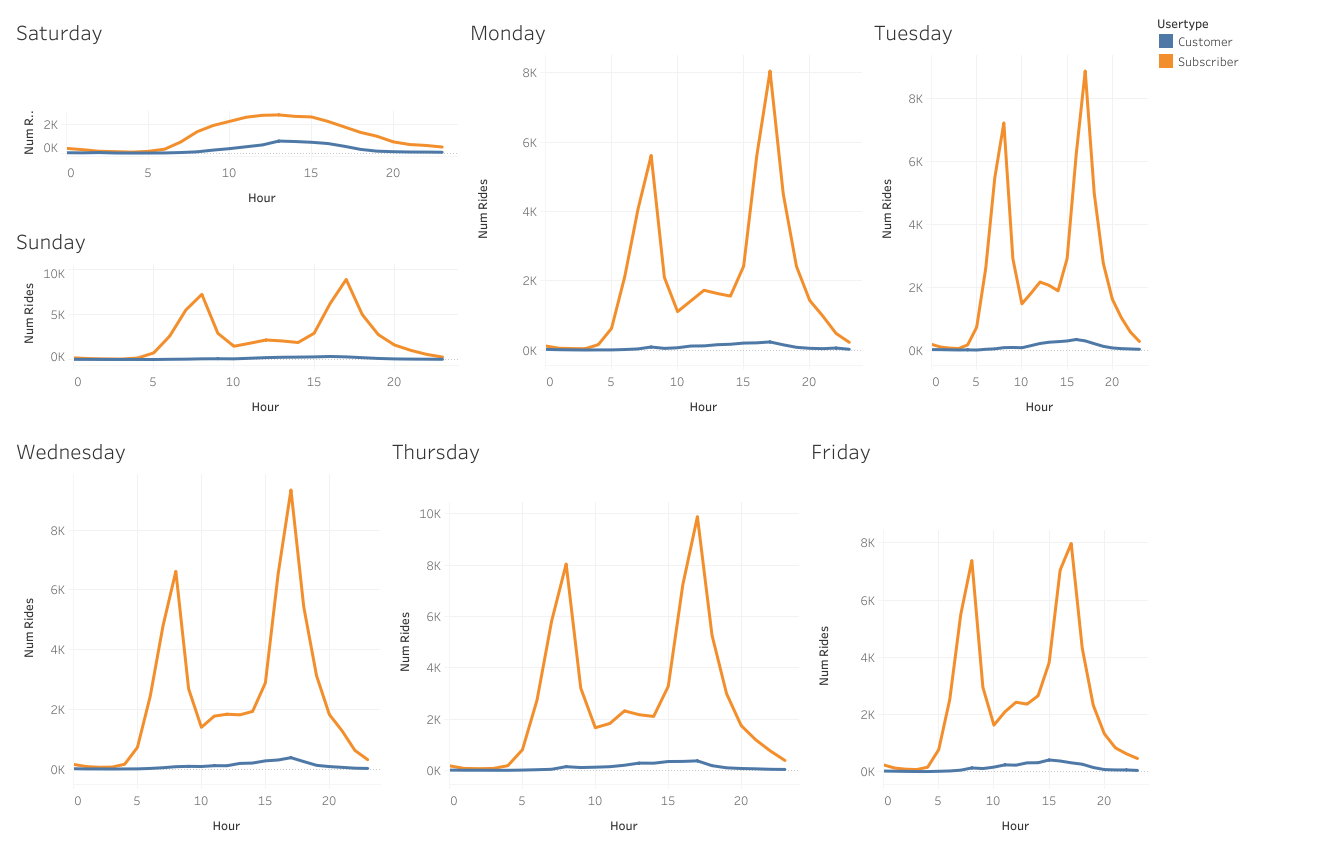

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG     1319    852 sRGB       TRUE    119180 38x38  


In [39]:
library('magick')

# Read and display the image
image <- image_read("/content/Dashboard_1.png")
print(image)  # This will display the image



This graph shows that members predominantly ride during peak commuting hours, with two noticeable peaks around 8-9 AM and 5-6 PM on weekdays, indicating usage for work commutes.
Casual riders tend to ride more consistently throughout the day, especially on weekends, suggesting leisure or recreational usage.


**Rides by Hour of Day for Members and Casual Users (General)**

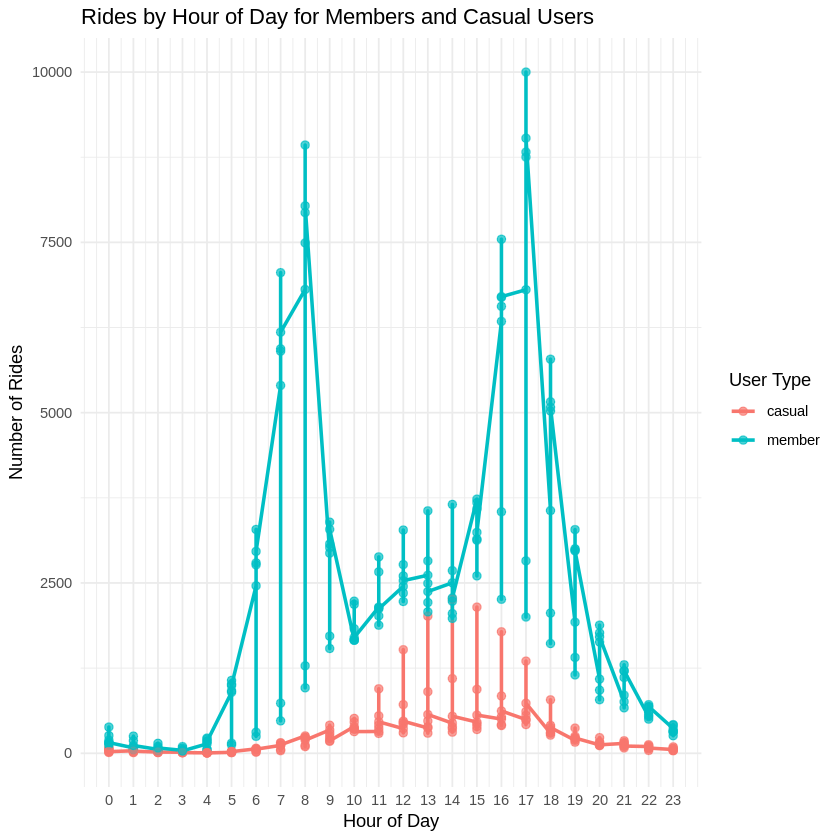

In [22]:
ggplot(hourly_rides_by_day, aes(x = hour, y = num_rides, color = member_casual, group = member_casual)) +
  geom_line(linewidth = 1) +  # Replace `size` with `linewidth`
  geom_point(size = 2, alpha = 0.7) +  # Adjust point size and add transparency
  scale_x_continuous(breaks = 0:23) +  # Show all hours on the x-axis
  labs(
    title = "Rides by Hour of Day for Members and Casual Users",
    x = "Hour of Day",
    y = "Number of Rides",
    color = "User Type"
  ) +
  theme_minimal()


Members display a strong pattern of morning and evening peak hours, aligning with standard workday commuting times.

Casual users show a more steady pattern throughout the day, with slightly more rides in the afternoon, reflecting a leisure-based usage pattern that is less tied to specific hours.


**Number of trips by day of the week (members and casual users)**

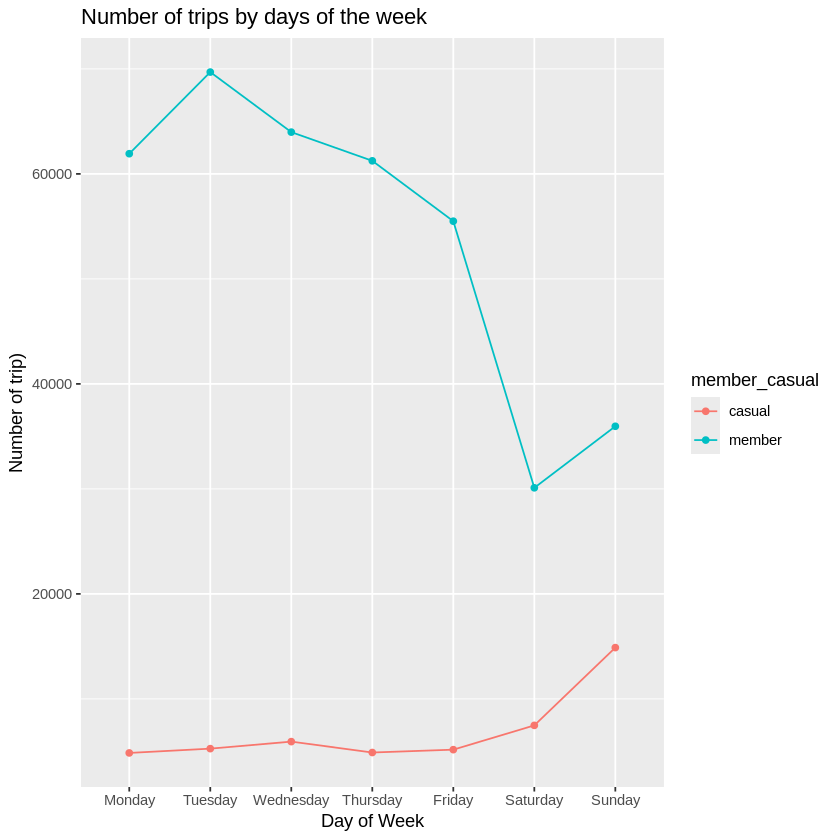

In [23]:
ggplot(ride_count_by_day_user_type, aes(x = day_of_week, y = num_rides, group = member_casual, color = member_casual)) +
  geom_line() +
  geom_point() +
  labs(title = "Number of trips by days of the week", x = "Day of Week", y = "Number of trip)")


Members have a higher number of trips during weekdays, particularly on Tuesday and Wednesday, supporting the hypothesis that their rides are for regular commuting.

Casual riders show increased activity on weekends, with a significant rise on Sundays, suggesting their usage is mostly for weekend leisure.



**Avg trip duration by day of the week (members and casual riders)**

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


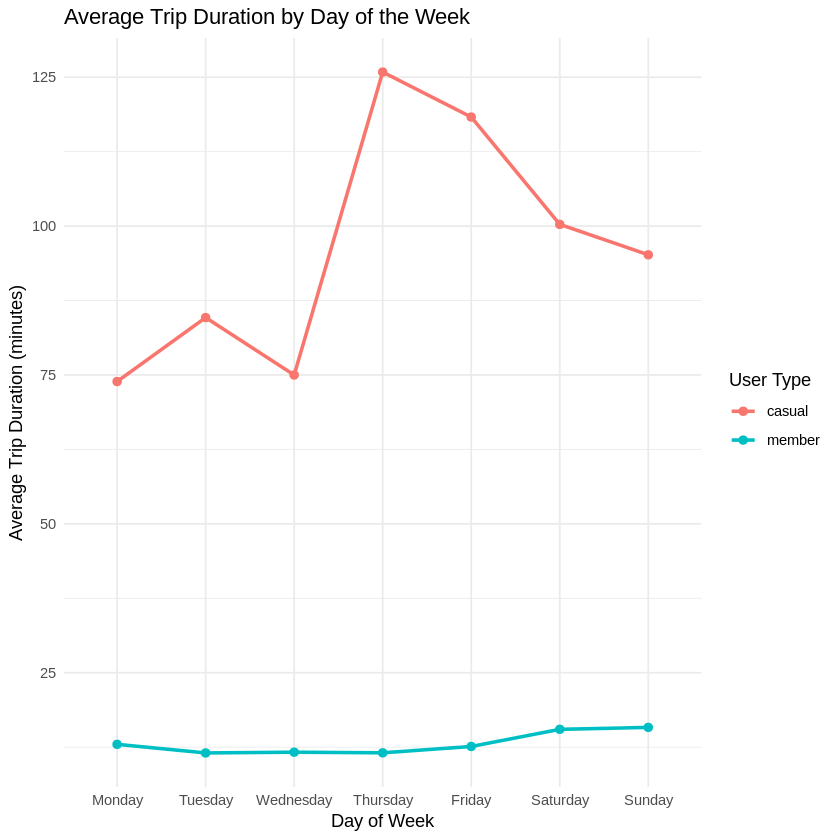

In [24]:
ggplot(avg_trip_duration_by_day_user_type, aes(x = day_of_week, y = avg_trip_duration, color = member_casual, group = member_casual)) +
  geom_line(size = 1) +  # Line graph
  geom_point(size = 2) +  # Add points on the lines
  labs(
    title = "Average Trip Duration by Day of the Week",
    x = "Day of Week",
    y = "Average Trip Duration (minutes)",
    color = "User Type"
  ) +
  theme_minimal()

Casual riders have significantly longer average trip durations, especially on Thursdays, Fridays, and weekends, which further supports the idea of leisure or exploratory usage.
Members maintain consistently shorter trip durations throughout the week, likely due to a focus on commuting, which usually involves shorter, more direct routes


**7. Recommendations**
   
1. Tailored Marketing Campaign
   
To convert casual riders into annual members, Cyclistic should target those living near their workplaces with a campaign focused on the health, financial, and productivity benefits of daily cycling. Most Cyclistic members are slightly older, often using bikes for regular commuting, while casual riders tend to be younger and use the service more for leisure. Highlighting the benefits of cycling to work—such as improved physical fitness, reduced commuting costs, and enhanced work performance through increased energy levels—could appeal to both age groups. Positioning annual memberships as a commitment to a healthier, more balanced daily routine can attract casual riders, encouraging them to integrate cycling into their lifestyle and become consistent members.

2. Weekend Membership Deals
   
Casual riders primarily use Cyclistic bikes on weekends, which suggests a focus on leisure activities rather than daily commuting. Cyclistic can capitalize on this trend by offering specialized weekend membership options at a reduced rate, such as a "Weekend Rider" package. This plan would provide unlimited access on Saturdays and Sundays, allowing these riders to experience the benefits of membership without the weekday commitment. By targeting younger riders who may want an affordable option for recreational biking, Cyclistic can introduce them to the perks of membership, making it more likely they’ll transition to full annual memberships as they recognize the value in expanded access.

3. Flexible Membership Options and Youth Partnerships
   
Most Cyclistic members are older than casual riders, indicating that the subscription model appeals more to individuals with regular, structured routines. To engage younger, casual riders and encourage them to consider membership, Cyclistic should introduce trial memberships and consider partnerships with schools and universities. Trial memberships could offer limited access during peak commuting hours, allowing younger users to experience the benefits of cycling without an immediate long-term commitment. Partnering with educational institutions to provide discounted memberships or limited-time offers for students could be a powerful strategy to attract younger users. This approach not only helps Cyclistic tap into a new demographic but also creates a habit of cycling for daily commutes, increasing the likelihood of converting these younger users into long-term members.




**8. Conclusion**
   
This analysis provides valuable insights into the distinct usage patterns of Cyclistic’s casual riders and annual members, highlighting opportunities to increase membership conversions. By understanding that casual riders are generally younger, tend to ride on weekends, and often use the service for leisure, Cyclistic can develop targeted strategies to meet these users' unique needs and motivations.
Implementing the recommended strategies—such as tailored marketing campaigns, weekend membership deals, flexible membership options, and partnerships with educational institutions—can effectively attract casual riders and encourage them to consider the benefits of annual membership. These initiatives align with Cyclistic's goal of growing its subscriber base by converting casual users into loyal, long-term members, ultimately driving increased engagement and sustained growth for the bike-share program.


**9. Appendix**

The additional charts included in the appendix provide deeper insights into the demographic breakdown of Cyclistic’s user base, particularly around age and gender differences. Analysis reveals a noticeable gender gap, with a significantly higher number of male users compared to female users, especially among annual members. This discrepancy suggests that there may be barriers or a lack of appeal for female riders, which Cyclistic can address through targeted strategies.
To attract more women to become Cyclistic members, it’s essential to focus on features that might address common concerns, such as safety and convenience. Cyclistic could consider implementing bikes with safety enhancements, like emergency call buttons, and ensuring that bike paths and docking stations are well-lit and located in secure areas. Marketing efforts that emphasize these safety features, along with testimonials from current female riders, can help make cycling appear more inclusive and safe.
Moreover, creating marketing campaigns tailored specifically for women could help bridge this gap. For example, Cyclistic could highlight health and fitness benefits and partner with women’s wellness groups or fitness communities to foster a supportive environment. By addressing the specific needs and concerns of female riders, Cyclistic has an opportunity to make the bike-share program more accessible and appealing, potentially increasing female memberships and fostering a more balanced user base.

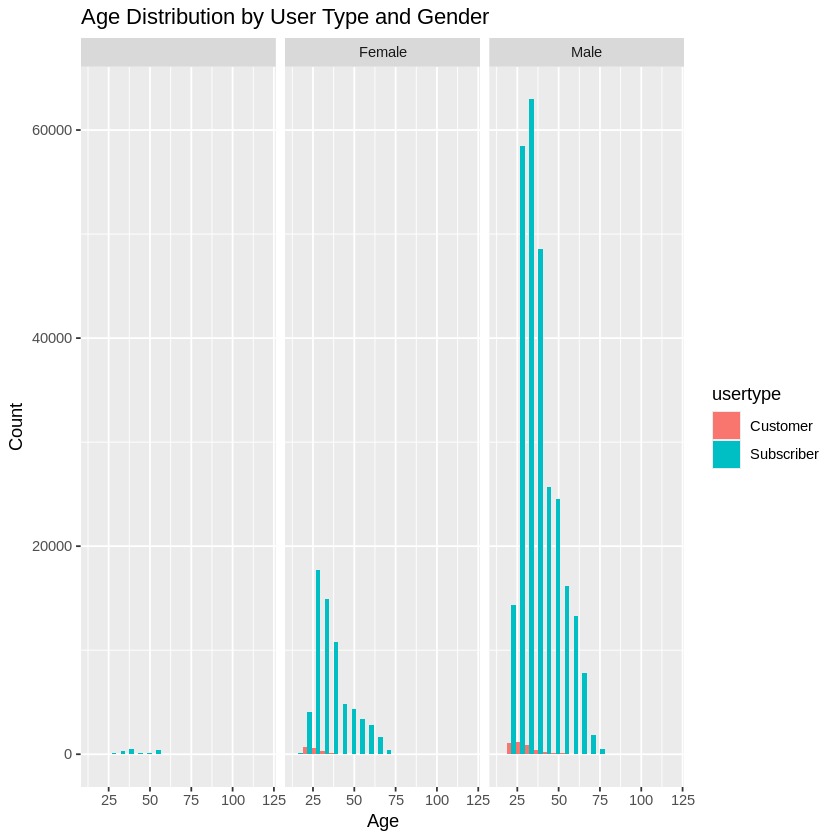

In [25]:
ggplot(trips_2019, aes(x = age, fill = usertype)) +
  geom_histogram(position = "dodge", bins = 20) +
  facet_wrap(~ gender) +
  labs(title = "Age Distribution by User Type and Gender", x = "Age", y = "Count")